In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from statistics import mean, median

In [2]:
# Function to extract average temperature from thermo.log
def extract_average_temperature(init_idx, base_directory):
    folder_path = f'{base_directory}{init_idx}'
    log_file_path = os.path.join(folder_path, 'thermo.log')

    if not os.path.exists(log_file_path):
        print(f"thermo.log not found for init_idx {init_idx}")
        return None

    try:
        log_data = pd.read_csv(log_file_path, sep='\s+')
        if 'T[K]' in log_data.columns:
            temperatures = log_data['T[K]'].tolist()
            return mean(temperatures)
        else:
            print(f"No 'temperature' column found in thermo.log for init_idx {init_idx}")
            return None
    except Exception as e:
        print(f"Error reading thermo.log for init_idx {init_idx}: {e}")
        return None

412.684131736527
539.4339321357286


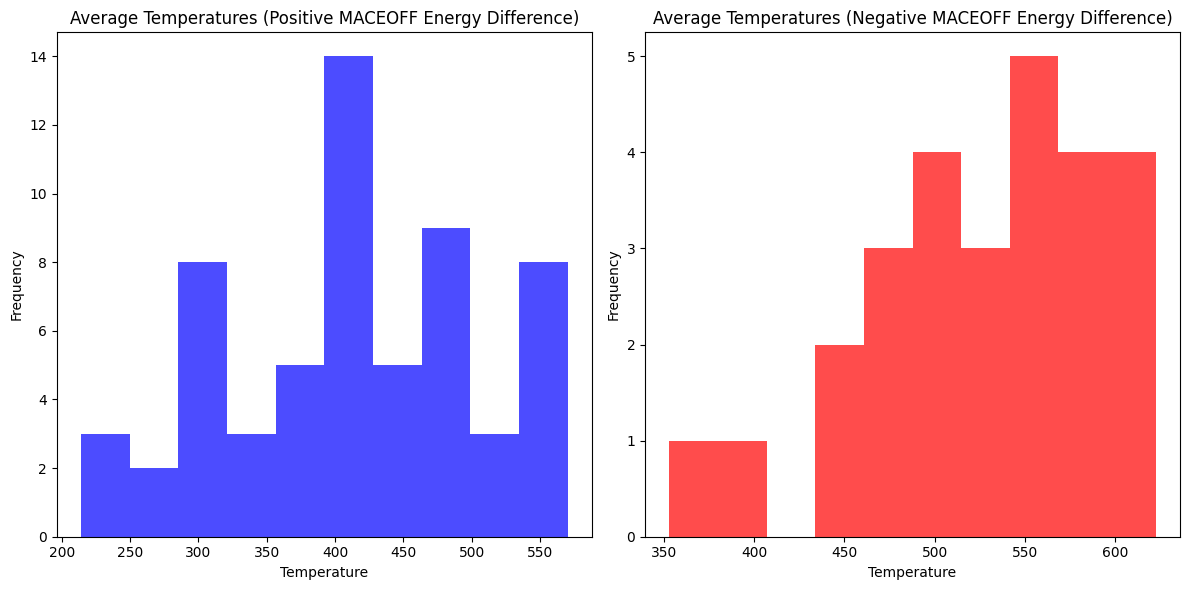

In [3]:
# Load the CSV file
df = pd.read_csv('records_str_atoms_leq_6.csv')

# Lists to store temperatures for positive and negative MACEOFF energy differences
positive_diff_temps = []
negative_diff_temps = []

# Loop through each row in the CSV file
for idx, row in df.iterrows():
    init_idx = str(row['init_idx'])
    maceoff_energy_diff = row['maceoff_energy_off_by_meV']

    # Get the average temperature for this init_idx
    base_directory = '../MODELPATH/maceoff_split_gemnet_dT_results/md_25ps_123_init_'
    avg_temp = extract_average_temperature(init_idx, base_directory)

    if avg_temp is not None:
        # Classify the temperatures based on MACEOFF energy difference
        if maceoff_energy_diff > 0:
            positive_diff_temps.append(avg_temp)
        else:
            negative_diff_temps.append(avg_temp)

print(median(positive_diff_temps))
print(median(negative_diff_temps))

# Plotting the histograms
plt.figure(figsize=(12, 6))

# Histogram for positive energy differences
plt.subplot(1, 2, 1)
plt.hist(positive_diff_temps, bins=10, color='blue', alpha=0.7)
plt.title('Average Temperatures (Positive MACEOFF Energy Difference)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Histogram for negative energy differences
plt.subplot(1, 2, 2)
plt.hist(negative_diff_temps, bins=10, color='red', alpha=0.7)
plt.title('Average Temperatures (Negative MACEOFF Energy Difference)')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Show the histograms
plt.tight_layout()
plt.show()